In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow # for see the image
from PIL import Image
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Load the MNIST data from keras.datasets**

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train) # image is in numerical form

numpy.ndarray

In [4]:
# shape of the numpy arrays

print("X_train shape",X_train.shape) # 28 in the last means grayscale image because for RGB it should be 3
print("Y_train shape",Y_train.shape)
print("X_test shape",X_test.shape)
print("Y_test shape",Y_test.shape)

X_train shape (60000, 28, 28)
Y_train shape (60000,)
X_test shape (10000, 28, 28)
Y_test shape (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [5]:
# print the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


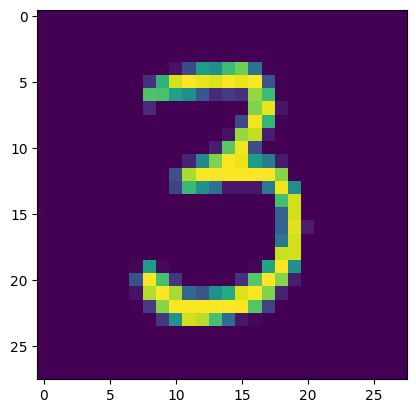

3


In [7]:
# display the image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label

print(Y_train[50])

# the image and correspondence label should be same

**Analyze Image labels**

In [8]:
print(Y_train.shape,Y_test.shape) # as all the image have the same dimension 28x28 so we don't need to resize it

(60000,) (10000,)


In [9]:
# unique values in Y_train and Y_test

print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can use one hot encoding and in that case:

If value is 0 then the labels will be 1000000000

If value is 1 then the labels will be 0100000000

In [10]:
# scaling the values (Normalization)

X_train=X_train/255
X_test=X_test/255 # we did that so that all images should be ranging between 0 to 1.

In [11]:
# 0/255 = 0

# 255/255 = 1

In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building Neural Network**

In [13]:
# setting up the layers for the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer (here we can not feed the data in the form of matrix so that we have to give it in the form of single array that's why used flatten layer, for RGB (28,28,3))
    keras.layers.Dense(50,activation='relu'), # hidden layer
    keras.layers.Dense(50,activation='relu'), # hidden layer
    keras.layers.Dense(10,activation='sigmoid') # output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# compilling the neural network

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
# Train the neural network

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8402 - loss: 0.5293
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9566 - loss: 0.1480
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9690 - loss: 0.1049
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9755 - loss: 0.0822
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0669
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0560
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9864 - loss: 0.0465
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9877 - loss: 0.0399
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9893 - loss: 0.0347
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9914 - loss: 0.0296


In [16]:
# training data accuracy = 99%

In [17]:
# Evaluate the model

loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1365
0.9682000279426575


In [18]:
# test data accuracy= 97%  (so there is no overfitting based on training data accuracy)

In [19]:
print(X_test.shape)

(10000, 28, 28)


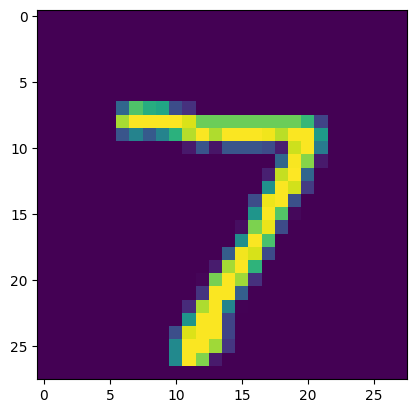

In [20]:
# first data point in the test data

plt.imshow(X_test[0])
plt.show()

In [21]:
print(Y_test[0])

7


In [22]:
# Create prediction model

Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
print(Y_pred.shape)

(10000, 10)


In [24]:
print(Y_pred[0]) # so these are the probabilities for number 7 based on index

[2.6783715e-05 8.3052320e-04 2.4593964e-02 3.3496192e-01 2.6115890e-06
 1.7624898e-04 2.6689705e-12 9.9999297e-01 1.5693283e-01 2.8798711e-01]


In [25]:
# model.predict() gives the prediction probability of each class for that data point.

In [26]:
# converting the prediction probabilities to class labels

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [27]:
# converting the prediction probabilities to class labels for all the test data points

Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 3, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [28]:
# Y_test ----> True labels
# Y_pred ----> Predicted labels

In [29]:
# Build confusion matrix

conf_mat = confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 962    1    1    1    0    1    9    2    2    1]
 [   0 1121    1    2    0    0    4    0    6    1]
 [   5    5  978   17    0    3    7    8    8    1]
 [   0    0    2  990    0    9    0    3    2    4]
 [   0    0    4    1  937    2    4    5    3   26]
 [   2    1    0   11    1  861    4    2    8    2]
 [   1    3    0    1    2   11  935    1    4    0]
 [   1    2    8   15    0    0    0  982   10   10]
 [   4    0    1    9    2    6    2    2  947    1]
 [   1    2    0   12    4    4    2    5   11  968]], shape=(10, 10), dtype=int32)


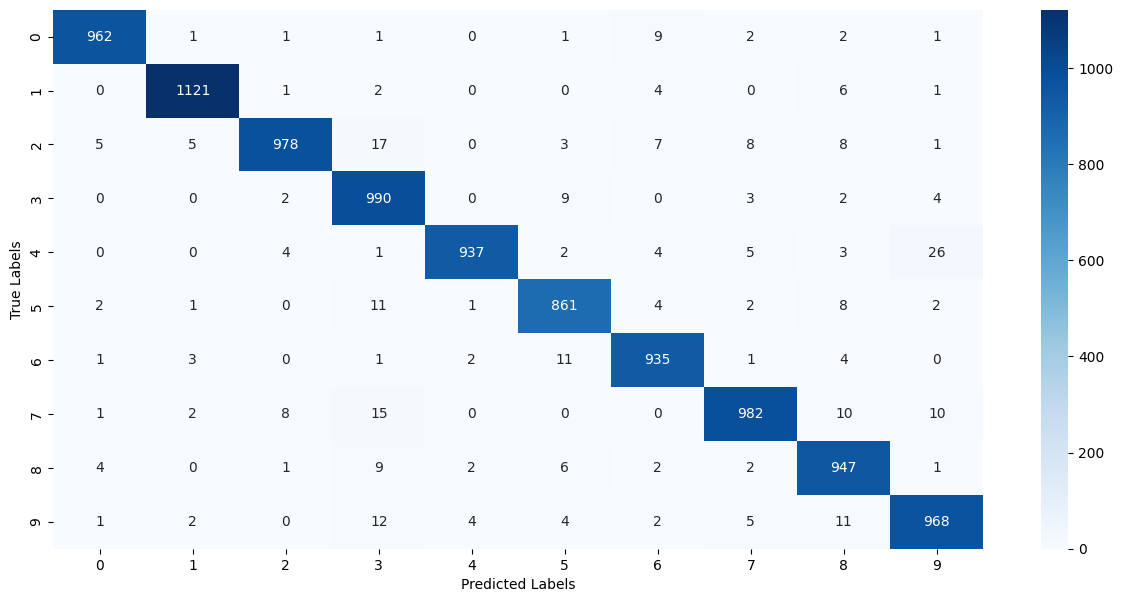

In [32]:
# Build heatmap

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues') # fmt=d gives integer values
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

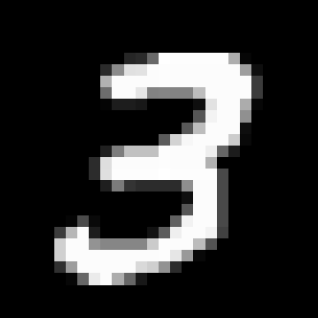

In [33]:
# Building the Predictive System

input_image_path='/content/MNIST_digit.png'

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

In [34]:
type(input_image)

numpy.ndarray

In [35]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [36]:
input_image.shape # RGB image

(318, 318, 3)

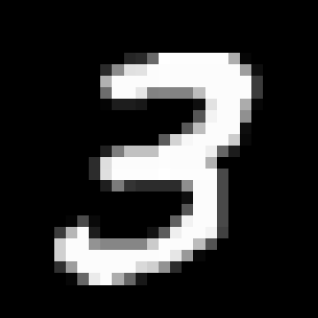

In [37]:
# Convert it into grayscale image because we have trained our model for grayscale image

input_image=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(input_image)

In [38]:
# Resize the image in 28x28 as we have trained our model earlier

input_image=cv2.resize(input_image,(28,28))
cv2_imshow(input_image)

In [39]:
input_image.shape

(28, 28)

In [40]:
# here also we will divide by 255

input_image=input_image/255

In [41]:
image_reshape=np.reshape(input_image,[1,28,28]) # because of 1 image we have used reshape, for RGB (1,28,28,3)
print(image_reshape.shape)

(1, 28, 28)


In [42]:
input_prediction=model.predict(image_reshape)
print(input_prediction) # probability values for 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[1.3063415e-12 9.7762913e-06 2.6948319e-09 1.0000000e+00 1.0064938e-13
  9.1601573e-03 6.0522603e-19 2.1057163e-05 8.1298423e-01 9.6221584e-01]]


In [43]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label) # predicted correctly

3
